In [ ]:
!pip install git+https://github.com/rcmalli/keras-squeezenet.git

  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-l954pzwq
  Running command git clone -q https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-l954pzwq
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-cp37-none-any.whl size=4423 sha256=147117a9ad3edf68f0ee80b38f3f4d0663c257914e4503d2fd68ffea3d042107
  Stored in directory: /tmp/pip-ephem-wheel-cache-kikcj7ho/wheels/15/75/ed/45fffbc76d921a5be07af533b774b35bbf40551334c51af91f
Successfully built keras-squeezenet


In [ ]:
!pip install tensorflow==1.14.0rc1

     |████████████████████████████████| 109.3MB 37kB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 491kB 35.7MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install q keras==2.1.1

     |████████████████████████████████| 307kB 4.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.1 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import numpy as np
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
import cv2
import gc
import numpy as np
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import time
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from keras.layers import *
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm
from keras import backend as K
from tqdm import tqdm


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


 99% 2.27G/2.29G [00:20<00:00, 125MB/s]
100% 2.29G/2.29G [00:20<00:00, 121MB/s]


In [ ]:
import zipfile
zf = "/content/chest-xray-pneumonia.zip"
target_dir = "/content/dataset/cnn/pneum onia_revamped"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [ ]:
image_width = 227
image_height = 227
channels = 3
batch_size = 32

train_dir = '/content/dataset/cnn/pneum onia_revamped/chest_xray/train'
test_dir = '/content/dataset/cnn/pneum onia_revamped/chest_xray/test'
valid_dir = '/content/dataset/cnn/pneum onia_revamped/chest_xray/val'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
train = image_gen.flow_from_directory(
      train_dir,
      target_size=(image_height, image_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_dir,
      target_size=(image_height , image_width),
      color_mode='rgb',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_dir,
      target_size=(image_height, image_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import *
import gc
import keras
from keras.layers import *
from keras import backend as K
import keras
#from tensorflow.python.keras import Sequential

In [ ]:
!pip install h5py pyyaml

In [ ]:

#store the accuracy
final_result=[]
#store history
history=[]
#store predictions
predictions=[]
#store answers
answers=[]
#store time taken
times=[]

#loading model
K.clear_session()
mod=SqueezeNet(include_top=False, weights='imagenet',input_shape=(image_height, image_width, channels))
#out_1=mod.layers[-5]


#adding global pooling layer to decrease dimension
gbl=GlobalAveragePooling2D()(mod.output)
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
out=Dense(1,activation='sigmoid')(gbl)
model=Model(inputs=mod.input,outputs=out)

model.compile(optimizer=Adam(3e-4), 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
#learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


callbacks_list = [early]



n_training_samples = len(train)
n_validation_samples = len(valid)
n_test_samples=len(test)
validationsteps=n_validation_samples/32





epoch=30
#loop through each fold
#for index in tqdm(range(1,6)):
  

#set all layers to non trainable


#learning rate schedular

#fitting the model 
#timing
start=time.time()
hist=model.fit_generator(train,steps_per_epoch=n_training_samples//32,epochs=epoch,validation_data=valid,validation_steps=validationsteps
                      , callbacks=callbacks_list
                          )
                        
                      
end=time.time()
times.append(end-start)







3039232/3032184 [==============================] - 0s 0us/step


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/30
3/5 [=================>............] - ETA: 8s - loss: 1.4633 - acc: 0.4896 

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.python.keras.models import load_model
model.save('/content/drive/MyDrive/final_squeezenet.h5')
'''model.save('/content/drive/MyDrive/squeezenet')
model = load_model('/content/drive/MyDrive/squeezenet.h5')'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
n_test_samples=len(test)
predict=model.predict_generator(test,steps=n_test_samples)
print(np.shape(predict))
submission_labels = np.argmax(predict, axis=1)

print(submission_labels.round())
print(np.shape(submission_labels))


(624,)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

score, acc = model.evaluate_generator(test,steps=test.samples//32
                            )
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.5301896819942876
Test accuracy: 0.7549342


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print('f1 score ',f1_score(submission_labels.round(),test.classes,average='micro'))
print('accuracy ',accuracy_score(submission_labels.round(),test.classes))
print('recall ',recall_score(submission_labels.round(),test.classes,average=None))
print('precision ',precision_score(submission_labels.round(),test.classes,average=None))

f1 score  0.7596153846153846
accuracy  0.7596153846153846
recall  [0.91176471 0.72988506]
precision  [0.3974359  0.97692308]


AUC Value  :  0.6871794871794872


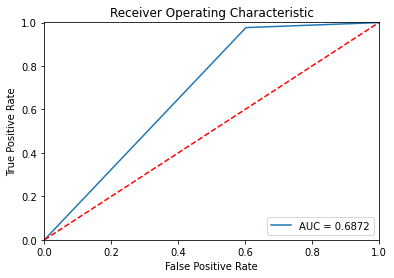

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fprValue2, tprValue2, thresholdsValue2 = roc_curve(test.classes,submission_labels.round())
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)
plt.title('Receiver Operating Characteristic')
plt.plot(fprValue2, tprValue2, label='AUC = %0.4f'% AUCValue)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

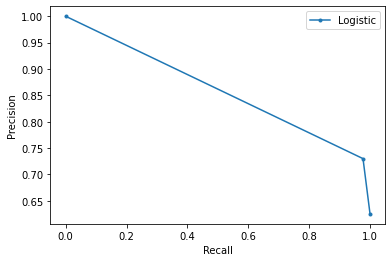

In [ ]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
precision, recall, _ = precision_recall_curve(test.classes, submission_labels.round())
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

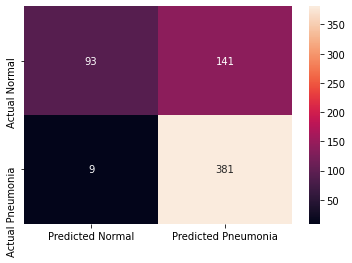

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(test.classes, submission_labels.round()),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")